Faiza Rafi - final

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load Data

In [11]:
import kagglehub
## get dataset from kaggle
path = kagglehub.dataset_download("abdullahragheb/all-autoimmune-disorder-10k")

print("Path to dataset files:", path)

## list all files in the kaggle dataset 
print(os.listdir(path))

Path to dataset files: /Users/frafi/.cache/kagglehub/datasets/abdullahragheb/all-autoimmune-disorder-10k/versions/5
['Comprehensive_Autoimmune_Disorder_Dataset.csv', 'Final_Balanced_Autoimmune_Disorder_Dataset.csv', 'Complete_Updated_Autoimmune_Disorder_Dataset.csv', 'Autoimmune_Disorder_10k_with_All_Disorders.csv', 'Complete_Updated_Autoimmune_Disorder_Dataset2.csv']


In [12]:
## read appropriate dataset from kaggle
data= pd.read_csv(os.path.join(path,"Autoimmune_Disorder_10k_with_All_Disorders.csv"))

## print dimension of data df and top rows of data
pd.set_option('display.max_columns', None)
print(data.shape)
data.head()

(12500, 79)


,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General 'unwell' feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,anti_LKM1,Anti_RNP,ASCA,Anti_Ro_SSA,Anti_CBir1,Anti_BP230,Anti_tTG,DGP,Anti_BP180,ASMA,Anti_IF,IgG_IgE_receptor,Anti_SRP,Anti_desmoglein_3,Anti_La_SSB,Anti_Jo1,ANCA,anti_centromere,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm
0,1,65,Female,Linear IgA disease,26,3.54,13.18,44.35,99.85,31.80,33.12,12.52,2.08,8278,72.25,19.80,9.26,4.02,1.08,429117,8.08,1,1.50,1.81,40,1.32,0.49,3.10,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,61,Male,Dermatomyositis,106,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,8592,56.73,42.68,2.66,1.67,1.16,487184,8.92,1,1.76,1.08,23,0.40,0.17,2.73,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,42,Male,Ord's thyroiditis,6,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,8719,50.92,31.21,6.96,4.32,1.07,499962,7.70,1,2.49,1.42,44,0.95,0.26,1.02,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,45,Female,Restless legs syndrome,11,4.57,14.96,40.10,85.95,27.42,33.93,12.14,1.79,7698,41.20,33.60,6.54,3.12,0.72,129793,10.95,1,0.75,1.05,25,1.06,0.26,5.45,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,78,Female,Autoimmune polyendocrine syndrome type 2 (APS2),30,4.88,11.21,37.58,93.16,29.87,31.29,15.65,1.42,9755,45.82,42.57,3.05,4.60,1.40,467390,10.51,1,0.76,1.14,42,0.73,0.25,1.05,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In the original dataset -- 12,500 patient samples, 79 columns (78 features, 1 target label column -> diagnosis)  

## Preprocess data 

### Clean features 

The data contains duplicate columns but cannot be detected with data.columns.duplicated() because the name slightly varies (ex. '-' vs. '_' OR Anti-'x' vs. A'x'), so duplicate columns are manually identified. <br> The frequency of the values in the columns do not match up, so will keep the first occurrence of the column and remove the second.

In [13]:
## print columms of data (features)
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'Sickness_Duration_Months',
       'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW',
       'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes',
       'Monocytes', 'Eosinophils', 'Basophils', 'PLT_Count', 'MPV', 'ANA',
       'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP', 'Anti-dsDNA',
       'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg',
       'Anti-SMA', 'Low-grade fever', 'Fatigue or chronic tiredness',
       'Dizziness', 'Weight loss', 'Rashes and skin lesions',
       'Stiffness in the joints', 'Brittle hair or hair loss',
       'Dry eyes and/or mouth', 'General 'unwell' feeling', 'Joint pain',
       'Anti_dsDNA', 'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP',
       'ASCA', 'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP',
       'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP',
       'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA',


In [14]:
## check duplicate columns value and occurance each value as well as null values in those columns 
print(data['Anti-Sm'].value_counts(), data['Anti-Sm'].isnull().sum())
print(data['Anti_Sm'].value_counts(), data['Anti_Sm'].isnull().sum())
print(data['Anti-dsDNA'].value_counts(), data['Anti-dsDNA'].isnull().sum())
print(data['Anti_dsDNA'].value_counts(), data['Anti_dsDNA'].isnull().sum())
print(data['Anti-SMA'].value_counts(),data['Anti-SMA'].isnull().sum())
print(data['ASMA'].value_counts(),data['ASMA'].isnull().sum())

Anti-Sm
0.0    5012
1.0    4988
Name: count, dtype: int64 2500
Anti_Sm
0    12315
1      185
Name: count, dtype: int64 0
Anti-dsDNA
1.0    5024
0.0    4976
Name: count, dtype: int64 2500
Anti_dsDNA
0    12315
1      185
Name: count, dtype: int64 0
Anti-SMA
0.0    5010
1.0    4990
Name: count, dtype: int64 2500
ASMA
0    12416
1       84
Name: count, dtype: int64 0


In [15]:
## remove the duplicate cols and remove
data.drop(['Anti_Sm','Anti_dsDNA', 'ASMA'], axis=1, inplace=True)

# remove patient_ID since it is only a indicator of sample # but not a feature of the sample
data.drop('Patient_ID', axis=1, inplace=True)

In [16]:
data.head(3)

,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General 'unwell' feeling,Joint pain,Anti_enterocyte_antibodies,anti_LKM1,Anti_RNP,ASCA,Anti_Ro_SSA,Anti_CBir1,Anti_BP230,Anti_tTG,DGP,Anti_BP180,Anti_IF,IgG_IgE_receptor,Anti_SRP,Anti_desmoglein_3,Anti_La_SSB,Anti_Jo1,ANCA,anti_centromere,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies
0,65,Female,Linear IgA disease,26,3.54,13.18,44.35,99.85,31.80,33.12,12.52,2.08,8278,72.25,19.80,9.26,4.02,1.08,429117,8.08,1,1.50,1.81,40,1.32,0.49,3.10,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,61,Male,Dermatomyositis,106,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,8592,56.73,42.68,2.66,1.67,1.16,487184,8.92,1,1.76,1.08,23,0.40,0.17,2.73,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,42,Male,Ord's thyroiditis,6,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,8719,50.92,31.21,6.96,4.32,1.07,499962,7.70,1,2.49,1.42,44,0.95,0.26,1.02,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
data.shape

(12500, 75)

### Clean missing values 

In [18]:
## find columns/features with missing values and get the total of rows/samples that have null value
null_val = data.isnull().sum()
print(null_val[null_val > 0].to_string())

Anti-dsDNA           2500
Anti-Sm              2500
Rheumatoid factor    2500
ACPA                 2500
Anti-TPO             2500
Anti-Tg              2500
Anti-SMA             2500


In [19]:
## check that the missing values are only present in the normal samples 

## for the columns/features that have missing values, print the unique values in the Diagnosis col (should only be normal)
print(data.loc[data['Anti-dsDNA'].isnull(), 'Diagnosis'].unique())
print(data.loc[data['Anti-Sm'].isnull(), 'Diagnosis'].unique())
print(data.loc[data['Rheumatoid factor'].isnull(), 'Diagnosis'].unique())
print(data.loc[data['ACPA'].isnull(), 'Diagnosis'].unique())
print(data.loc[data['Anti-TPO'].isnull(), 'Diagnosis'].unique())
print(data.loc[data['Anti-Tg'].isnull(), 'Diagnosis'].unique())
print(data.loc[data['Anti-SMA'].isnull(), 'Diagnosis'].unique())

['Normal']
['Normal']
['Normal']
['Normal']
['Normal']
['Normal']
['Normal']


In [20]:
## print the unique values of the columns/features with missing values 
print('Anti-dsDNA:', data['Anti-dsDNA'].unique())
print('Anti-Sm:', data['Anti-Sm'].unique())
print('Rheumatoid factor:', data['Rheumatoid factor'].unique())
print('ACPA:', data['ACPA'].unique())
print('Anti-TPO:', data['Anti-TPO'].unique())
print('Anti-Tg:', data['Anti-Tg'].unique())
print('Anti-SMA:', data['Anti-SMA'].unique())

Anti-dsDNA: [ 1.  0. nan]
Anti-Sm: [ 1.  0. nan]
Rheumatoid factor: [ 0.  1. nan]
ACPA: [ 1.  0. nan]
Anti-TPO: [ 0.  1. nan]
Anti-Tg: [ 1.  0. nan]
Anti-SMA: [ 1.  0. nan]


All the missing values in the data are from the Normal patient samples (2500) in the auto-antibodies features (7). These features have values 0, 1 indicating the absence or presence of the auto-antibody OR nan in the normal samples since it may not have been tested for, etc. 

In order to handle the missing values in the auto-antibodies features of normal samples, can be converted to 0 since they are associated with autoimmune disease, and in the normal sample, we can safely assume that there is an absence of the auto-antibodies.

In [21]:
## for all missing values in data, add in value 0
data.fillna(0, inplace=True)

In [22]:
## check that there are no missing values -- should be false 
data.isnull().any().any()

False

### Check feature type

In [23]:
## print type of all columns in data
print(data.dtypes)

Age                               int64
Gender                           object
Diagnosis                        object
Sickness_Duration_Months          int64
RBC_Count                       float64
                                 ...   
Anti_tissue_transglutaminase      int64
anti_Scl_70                       int64
Anti_Mi2                          int64
Anti_parietal_cell                int64
Progesterone_antibodies           int64
Length: 75, dtype: object


Gender feature is a string. <br> To be consistent with all other features (float or int) and run ML classifiers, convert Gender feature values to binary (type int), indicating 0 for female and 1 for male.

In [24]:
## print Gender col 
print(data['Gender'].head())
## use label encoder to convert Gender feature to binary
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
# print gender col
print(data['Gender'].head())

0    Female
1      Male
2      Male
3    Female
4    Female
Name: Gender, dtype: object
0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64


## Class reduction 

There are 116 classes in the data which is complex. For developing a classfier, it will be helpful to simplify the data by reducing the number of classes by selecting top occurring diseases and classify the remaining diseases into groups of disease classes. 

In [25]:
## print number of conditions
print("conditions:",len(data['Diagnosis'].unique())) ## 115 disease conditions + normal

## define count as number of patient samples for each condition (occurrence of each disease in data)
count = (pd.DataFrame(data['Diagnosis'].value_counts()))

## print occurences (# of samples) of each condition and print count df 
print("total samples",count.sum()) ## 12500 (checking that all sample data is present)
print(count.to_string())

conditions: 116
total samples count    12500
dtype: int64
                                                      count
Diagnosis                                                  
Normal                                                 2500
Endometriosis                                           184
Dermatomyositis                                         183
Autoimmune oophoritis                                   170
Autoimmune orchitis                                     162
Myasthenia gravis                                       149
Dermatitis herpetiformis                                101
Antiphospholipid syndrome                               101
Hidradenitis suppurativa                                101
Vasculitis                                              101
Morphea                                                  99
Immune thrombocytopenia                                  99
Chronic inflammatory demyelinating polyneuropathy        98
Interstitial lung disease                 

In [26]:
## how many conditions have greater than 89 occurrences
print((count > 89).sum()) ## 29 conditions 

## what is the total number of patients with conditions that have occurance greater than 89
print(count[count > 89].sum()) 

print(29/116)
print(5539/12500)


count    29
dtype: int64
count    5539.0
dtype: float64
0.25
0.44312


Using an occurrence of 90 as a minimum threshold, 29 conditions were identified as the top common conditions. These 29 conditions account for 25% of all conditions and 44% of all sample data. The remaining 87 conditions will be combined into groups.

### Clustering

To combine the 87 diseases, they will be clustered by the similarity in features. 

In [98]:
## get diseases that have less than 90 occurances
least_occuring=(data['Diagnosis'].value_counts()[data['Diagnosis'].value_counts() < 90].index)
least_occuring_df= data[data['Diagnosis'].isin(least_occuring)]

## separate features and label of least occuring df
least_occuring_y = least_occuring_df.iloc[:,least_occuring_df.columns == 'Diagnosis']
least_occuring_df = least_occuring_df.drop('Diagnosis', axis =1)
least_occuring_df.head(3)

,Age,Gender,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,...,C1_inhibitor,Anti_TIF1,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies
0,65,0,26,3.54,13.18,44.35,99.85,31.80,33.12,12.52,...,0,0,1,0,0,0,0,0,0,0
2,42,1,6,3.91,13.66,42.41,88.26,29.43,35.61,15.52,...,0,0,0,0,0,0,0,0,0,0
3,45,0,11,4.57,14.96,40.10,85.95,27.42,33.93,12.14,...,0,0,0,0,0,0,0,0,0,0


/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


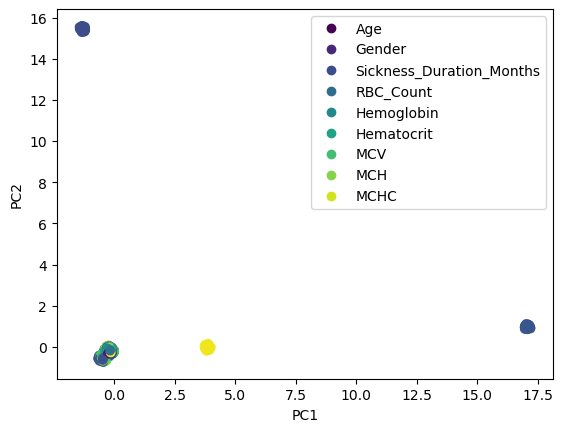

In [99]:
## PCA on the least occuring sample to determine which features to prioritize clustering by

## encode target labels to numeric
le = LabelEncoder()
y_encoded = (pd.DataFrame(le.fit_transform(least_occuring_y))).squeeze()

## scale values of features in least occuring df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(least_occuring_df)

## apply PCA 
pca = PCA()  
x_pca = pca.fit_transform(X_scaled)
plot = plt.scatter(x_pca[:,0], x_pca[:,1], c=y_encoded)
plt.legend(handles=plot.legend_elements()[0], labels=list(X.columns))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [101]:
## cluster
kmeans = KMeans(n_clusters=10, random_state=1)
cluster_labels = kmeans.fit_predict(X_pca)

## add diagnosis col to least occuring df which gives the # cluster sample is in 
least_occuring_df['Diagnosis'] = clusters
least_occuring_df

## combne with top occuring samples to get full df
final_data = pd.concat([least_occuring_df, data[~data['Diagnosis'].isin(least_occuring)]], ignore_index=True)

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [102]:
## final data distribution of diseases after clustering -- 29 conditions + 10 clustered groups
final_data['Diagnosis'].value_counts()

Diagnosis
Normal                                               2500
4                                                     757
1                                                     723
6                                                     722
9                                                     720
5                                                     714
2                                                     679
8                                                     678
3                                                     665
0                                                     664
7                                                     639
Endometriosis                                         184
Dermatomyositis                                       183
Autoimmune oophoritis                                 170
Autoimmune orchitis                                   162
Myasthenia gravis                                     149
Dermatitis herpetiformis                              101
Hidr

Check the diseases in the clusters by getting the index of the sample and checking the diagnosis of the sample index from the original data. 

In [103]:
clust0= final_data[final_data['Diagnosis'] == 0].index
data.loc[clust0, 'Diagnosis']

4       Autoimmune polyendocrine syndrome type 2 (APS2)
7                                              Myositis
21                               Autoimmune retinopathy
22                                    Myasthenia gravis
38                                Autoimmune oophoritis
                             ...                       
6938                                   Behçet's disease
6941                      Opsoclonus myoclonus syndrome
6943                              Interstitial cystitis
6947                               Giant cell arteritis
6951                                        Sarcoidosis
Name: Diagnosis, Length: 664, dtype: object

In [104]:
clust2= final_data[final_data['Diagnosis'] == 2].index
data.loc[clust2, 'Diagnosis']

1                                         Dermatomyositis
3                                  Restless legs syndrome
5                                     Autoimmune orchitis
12                                      Addison's disease
14                                       Susac's syndrome
                              ...                        
6908                             Diabetes mellitus type 1
6927    Undifferentiated connective tissue disease (UCTD)
6931                                     Behçet's disease
6944                                     Behçet's disease
6954                          Discoid lupus erythematosus
Name: Diagnosis, Length: 679, dtype: object

<br> This clustering method is not ideal to group the diseases. The same disease is in two different clusters (Behçet's disease in both clusters 0 and 2), and diseases in some clusters do not clinically and intuitively make sense do be grouped together. 


### Manual grouping

Instead to overcome this and to avoid arbitrary grouping, the diseases are categorized by the organ system that they primarily impact. 

The 87 diseases were categorized into 9 different organ systems. They are grouped by their dominant impact in the body (where they attack) and symptoms. Some diseases are systemic - impact multiple organ symptoms- and ultimately was grouped by my discretion.

In [105]:
## read excel file with all other 87 disease categorized into 9 groups into df other_class and print df and dimensions
other_class= pd.read_excel("Autoimmune_disease_classification.xlsx",usecols=[0, 1], index_col=0)
print(other_class)
print('categories:',other_class.size) ## 9 disease categories
print('diseases:',len(other_class['Autoimmune Diseases'].str.split(',').sum())) ## 87 total disease categorized

                                                    Autoimmune Diseases
Organ Systems                                                          
Musculoskeletal       Myositis,Polymyalgia rheumatica,Inclusion body...
Skin                  Epidermolysis bullosa acquisita,Gestational pe...
Nervous               Transverse myelitis,Restless legs syndrome,Acu...
Cardiovascular+Blood  Rheumatoid vasculitis,Lupus vasculitis,Microsc...
Eye                   Scleritis,Cogan syndrome,Graves' ophthalmopath...
Respiratory           Sarcoidosis,Rheumatoid lung disease,Pulmonary ...
Excretory             Membranous nephropathy,Interstitial nephritis,...
Digestive             Celiac disease,Autoimmune hepatitis,Crohn's di...
Endocrine             Autoimmune polyendocrine syndrome type 1 (APS1...
categories: 9
diseases: 87


In [106]:
## loop to rename remaining 90 diseases as organ_system they primarily impact

## for each disease group (9 rows in other_class df)
## define organ_sys as the index/row_names of each group
## define disease as the list of conditions (Autoimmune diseases col) categorized into that group and separate values by ","
## if any value (disease) in the diagnosis column of data is in the categorized list of diseases, 
## then rename it to organ_system other leave as is
for i in range (9):
    organ_sys = other_class.index[i]
    disease = other_class.loc[organ_sys, "Autoimmune Diseases"]
    disease= disease.split(',')
    data['Diagnosis']=data['Diagnosis'].apply(lambda x: organ_sys if x in disease else x)

## print diagnosis column of data and check that disease are renamed to the appropriate grouped class
print(data['Diagnosis'].head(15))

## print number of classes -- unique values/conditions in diagnosis col
print("conditions:",len(data['Diagnosis'].unique()))

0                     Skin
1          Dermatomyositis
2                Endocrine
3                 Nervous 
4                Endocrine
5      Autoimmune orchitis
6                 Nervous 
7          Musculoskeletal
8              Respiratory
9                     Skin
10               Endocrine
11                    Skin
12               Endocrine
13               Digestive
14    Cardiovascular+Blood
Name: Diagnosis, dtype: object
conditions: 38


After condensing the target labels in the data, there are 38 classes (37 disease + 1 normal) across 12500 patient samples

In [107]:
print(pd.DataFrame(data['Diagnosis'].value_counts()).to_string)

<bound method DataFrame.to_string of                                                    count
Diagnosis                                               
Normal                                              2500
Cardiovascular+Blood                                1415
Nervous                                             1287
Skin                                                1077
Eye                                                  805
Digestive                                            646
Endocrine                                            632
Musculoskeletal                                      460
Respiratory                                          320
Excretory                                            319
Endometriosis                                        184
Dermatomyositis                                      183
Autoimmune oophoritis                                170
Autoimmune orchitis                                  162
Myasthenia gravis                                  

### Split dataset 
80% train, 20% test

In [109]:
## define X as all features of df (except patient ID) and y as the target label (diagnosis col)
X = data.drop('Diagnosis', axis =1)
y = data.iloc[:,data.columns == 'Diagnosis']

In [110]:
## squeeze y so that it is a 1D vector
y = y.squeeze()

# encode y -- converts string labels into numerical labels 
le = LabelEncoder()
y_encoded = pd.DataFrame(le.fit_transform(y))
le.classes_

array(['Antiphospholipid syndrome', 'Autoimmune oophoritis',
       'Autoimmune orchitis', 'Autoimmune urticaria',
       "Bickerstaff's encephalitis", 'Cardiovascular+Blood',
       'Chronic inflammatory demyelinating polyneuropathy',
       'Dermatitis herpetiformis', 'Dermatomyositis', 'Digestive',
       'Discoid lupus erythematosus', 'Endocrine', 'Endometriosis',
       'Excretory', 'Eye', 'Guillain-Barré syndrome',
       'Hidradenitis suppurativa', 'IgA nephropathy',
       'Immune thrombocytopenia', 'Interstitial cystitis',
       'Interstitial lung disease', 'Kawasaki disease', "Mooren's ulcer",
       'Morphea', 'Musculoskeletal', 'Myasthenia gravis', 'Nervous ',
       "Neuromyelitis optica (Devic's disease)/NMOSD", 'Normal',
       'Opsoclonus myoclonus syndrome', 'Polymyositis',
       'Premature ovarian failure', 'Respiratory', 'Rheumatoid arthritis',
       'Skin', 'Systemic Lupus Erythematosus', 'Vasculitis', 'Vitiligo'],
      dtype=object)

In [111]:
## split X and y into training and test set with 80% in train set and 20% in test set 
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, test_size=0.2, stratify=y)

## squeeze y into 1D vector
y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(x_test.head(), y_test)
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

       Age  Gender  Sickness_Duration_Months  RBC_Count  Hemoglobin  \
7263    57       1                        83       4.36       13.98   
2661    29       0                        81       3.63       13.59   
7609    47       0                       100       4.37       10.03   
11500   21       0                         0       5.78       13.97   
527     45       0                        15       4.87       12.10   

       Hematocrit     MCV    MCH   MCHC    RDW  ...  C1_inhibitor  Anti_TIF1  \
7263        43.92   96.23  31.79  35.50  14.20  ...             0          0   
2661        44.42   97.39  31.49  31.37  15.97  ...             0          0   
7609        39.42  102.74  28.90  32.97  12.64  ...             0          0   
11500       47.21   80.63  28.60  32.88  13.25  ...             0          0   
527         44.95   88.82  26.49  35.42  14.22  ...             1          0   

       Anti_epidermal_basement_membrane_IgA  Anti_OmpC  pANCA  \
7263                       

In [112]:
classes = np.unique(y_test)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

74 features, 38 classes (1 normal, 37 disease), 12,500 patient samples <br>
Training set: 10,000 samples <br>
Test set: 2500 samples

## Predictive models: before class balancing

Fitting random forest, logistic regression, and standard vector classification to the data with grid search to determine the best parameters to use. Since there is class imbalance in the data. All the classifiers will use class_weight = 'balanced' to handle the data appropriately. Also, scoring metric vector is input to get various scores aside from accuracy alone, including roc-auc,f1, precision and recall. These methods use divsion to calculate and to handle any divison by zero, the zero_division parameter is set to 1. The grid search will have refit set to roc-auc so that it can output the parameters that result in the best score.

### Random forest

In [82]:
## Random Forest classifier model with grid search CV
scoring_metrics = {
    'roc_auc': make_scorer(roc_auc_score, average='weighted', needs_proba=True, multi_class='ovr'),
    'accuracy': 'accuracy', 
    'f1': make_scorer(f1_score, average='weighted',zero_division=1),
    'precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'recall': make_scorer(recall_score, average='weighted',zero_division=1)
}
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1, oob_score= True, class_weight='balanced',n_jobs=-1),
                  param_grid={'n_estimators':[100,250,500],'max_depth': [25,30,50], 'criterion': ['gini', 'entropy']},
                  scoring= scoring_metrics, refit='roc_auc', cv=3)

In [83]:
## train gs by fitting with x and y training sets
rf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 30, 50],
                         'n_estimators': [100, 250, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, average=weighted, zero_division=1),
                      'precision': make_scorer(precision_score, average=weighted, zero_division=1),
                      'recall': make_scorer(recall_score, average=weighted, zero_division=1),
                      'roc_auc': make_scorer(roc_auc_score, needs_proba=True, average=weighted, multi_class=ovr)})

In [84]:
## get results of parameters and score of best model and all 5 cv accuracy scores from each iteration of the random forest in gs_rf
print(rf.best_params_)
print(rf.best_score_)
pd.set_option('display.max_columns', None)
pd.DataFrame(rf.cv_results_)

{'criterion': 'gini', 'max_depth': 25, 'n_estimators': 500}
0.7834128541720693


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,1.576252,0.298130,0.211191,0.022546,gini,25,100,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.775419,0.785175,0.779089,0.779894,0.004024,8,0.411818,0.418542,0.410141,0.413500,0.003630,9,0.409917,0.417085,0.410900,0.412634,0.003173,5,0.425706,0.430986,0.431057,0.429250,0.002506,18,0.411818,0.418542,0.410141,0.413500,0.003630,9
1,3.248394,0.023017,0.386742,0.031152,gini,25,250,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.780152,0.787602,0.781629,0.783128,0.003221,2,0.427115,0.434443,0.424842,0.428800,0.004097,8,0.415961,0.422271,0.416192,0.418141,0.002922,1,0.461525,0.447925,0.452342,0.453931,0.005664,17,0.427115,0.434443,0.424842,0.428800,0.004097,8
2,6.350843,0.121330,0.693209,0.029434,gini,25,500,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.778852,0.787935,0.783452,0.783413,0.003708,1,0.432513,0.438644,0.436244,0.435800,0.002522,6,0.415375,0.419072,0.417913,0.417453,0.001544,2,0.527685,0.503812,0.508329,0.513275,0.010355,15,0.432513,0.438644,0.436244,0.435800,0.002522,6
3,1.645761,0.013737,0.219339,0.007326,gini,30,100,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.778588,0.787490,0.778626,0.781568,0.004187,6,0.427115,0.433543,0.431143,0.430600,0.002652,7,0.410863,0.414721,0.413978,0.413188,0.001671,4,0.453944,0.476871,0.480475,0.470430,0.011750,16,0.427115,0.433543,0.431143,0.430600,0.002652,7
4,3.896383,0.045509,0.463531,0.031587,gini,30,250,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.780119,0.788228,0.777662,0.782003,0.004515,5,0.429514,0.440744,0.442844,0.437701,0.005852,4,0.408262,0.416889,0.416983,0.414044,0.004089,3,0.619449,0.642932,0.635454,0.632612,0.009795,11,0.429514,0.440744,0.442844,0.437701,0.005852,4
5,7.779472,0.124776,0.835947,0.047298,gini,30,500,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.781119,0.788179,0.778541,0.782613,0.004074,4,0.435513,0.441344,0.440444,0.439100,0.002563,3,0.408475,0.414515,0.414289,0.412427,0.002795,6,0.672876,0.690524,0.675587,0.679662,0.007760,6,0.435513,0.441344,0.440444,0.439100,0.002563,3
6,2.300639,0.031063,0.235977,0.013791,gini,50,100,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.772596,0.773670,0.769197,0.771821,0.001907,9,0.437912,0.440444,0.434443,0.437600,0.002460,5,0.410310,0.413881,0.408315,0.410835,0.002303,8,0.636750,0.642870,0.671821,0.650480,0.015296,7,0.437912,0.440444,0.434443,0.437600,0.002460,5
7,5.429767,0.065406,0.516405,0.045245,gini,50,250,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.781297,0.782806,0.777692,0.780598,0.002145,7,0.441212,0.445545,0.440744,0.442500,0.002161,1,0.409288,0.414618,0.408616,0.410840,0.002685,7,0.709536,0.714191,0.708239,0.710655,0.002556,4,0.441212,0.445545,0.440744,0.442500,0.002161,1
8,10.691762,0.082369,0.938211,0.048790,gini,50,500,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.781187,0.785458,0.781658,0.782768,0.001912,3,0.438212,0.447045,0.440144,0.441800,0.003791,2,0.406650,0.413017,0.407450,0.409039,0.002832,9,0.765880,0.755906,0.759874,0.760553,0.004100,1,0.438212,0.447045,0.440144,0.441800,0.003791,2
9,3.246160,0.051066,0.251304,0.002285,entropy,25,100,"{'criterion': 'entropy', 'max_depth': 25, 'n_e...",0.733609,0.719425,0.725513,0.726182,0.005810,16,0.377025,0.355236,0.375638,0.369299,0.009961,16,0.337825,0.317685,0.339257,0.331589,0.009849,18,0.578710,0.564036,0.606369,0.583039,0.017551,12,

#### scale feature data (X) for log reg and SVC

In [114]:
## scale data for log_reg
scaler = StandardScaler()
x_train_scale_unb = scaler.fit_transform(x_train)
x_test_scale_unb = scaler.transform(x_test)

### log reg

In [116]:
## log_Reg
scoring_metrics = {
    'roc_auc': make_scorer(roc_auc_score, average='weighted', needs_proba=True, multi_class='ovr'),
    'accuracy': 'accuracy', 
    'f1': make_scorer(f1_score, average='weighted',zero_division=1),
    'precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'recall': make_scorer(recall_score, average='weighted',zero_division=1)
}
lg_unb = GridSearchCV(LogisticRegression(max_iter=10000, penalty='l2',class_weight='balanced',n_jobs=-1), 
                  param_grid= {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs','newton-cg', 'saga']},
                  scoring= scoring_metrics, refit='roc_auc', cv=3)

In [117]:
## train gs by fitting with x and y training sets
lg_unb.fit(x_train_scale_unb, y_train)
print(lg_unb.best_params_)
print(lg_unb.best_score_)

{'C': 10, 'solver': 'newton-cg'}
0.7882747269885336


### SVC

In [119]:
scoring_metrics = {
    'roc_auc': make_scorer(roc_auc_score, average='weighted', needs_proba=True, multi_class='ovr'),
    'accuracy': 'accuracy', 
    'f1': make_scorer(f1_score, average='weighted',zero_division=1),
    'precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'recall': make_scorer(recall_score, average='weighted',zero_division=1)
}

clf_unb = GridSearchCV(svm.SVC(random_state=1, gamma='scale', max_iter=10000, probability=True,class_weight='balanced'),
                   param_grid= {'C': [0.1, 1, 10, 100],  'kernel': ['linear','rbf']},
                   scoring= scoring_metrics, refit='roc_auc', cv=3)
                   

In [120]:
## train gs by fitting with x and y training sets
clf_unb.fit(x_train_scale_unb, y_train)
print(clf_unb.best_params_)
print(clf_unb.best_score_)

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packag

{'C': 1, 'kernel': 'rbf'}
0.7862411826450423


## Handle class imbalance

In [27]:
## get head and tail value counts (occurances) and proportion of value counts to total df (what % of target is class x)
print(y_train.value_counts().head().to_string, y_train.value_counts().tail().to_string)  
print(y_train.value_counts(normalize=True).head(), y_train.value_counts(normalize=True).tail())

<bound method Series.to_string of 0
28    2000
5     1132
26    1029
34     862
14     644
Name: count, dtype: int64> <bound method Series.to_string of 0
10    73
33    73
30    72
31    72
19    72
Name: count, dtype: int64>
0
28    0.2000
5     0.1132
26    0.1029
34    0.0862
14    0.0644
Name: proportion, dtype: float64 0
10    0.0073
33    0.0073
30    0.0072
31    0.0072
19    0.0072
Name: proportion, dtype: float64


In the training set itself, the target label (10,000 samples total) has a majority class with 2000 samples (20%) and minority classes with 72 samples which is less than 1% of the training set.

In [29]:
rus = RandomUnderSampler(sampling_strategy={28: 1000, 5 : 1000, 26:1000})
x_rus, y_rus = rus.fit_resample(x_train, y_train)
smote = SMOTE(sampling_strategy='not majority')
x_resampled, y_resampled = smote.fit_resample(x_rus, y_rus)

In [30]:
print(y_resampled.shape)
print(y_train.shape)
print(x_resampled.shape)
print(y_rus.value_counts().to_string) 
print(y_resampled.value_counts().to_string)  
print(y_resampled.value_counts(normalize=True))

(38000,)
(10000,)
(38000, 74)
<bound method Series.to_string of 0
5     1000
26    1000
28    1000
34     862
14     644
9      517
11     506
24     368
32     256
13     255
12     147
8      146
1      136
2      129
25     119
16      81
0       81
36      81
7       81
18      79
23      79
29      78
17      78
20      78
6       78
21      78
3       77
4       75
27      74
22      74
35      74
33      73
10      73
15      73
37      73
19      72
30      72
31      72
Name: count, dtype: int64>
<bound method Series.to_string of 0
0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
13    1000
14    1000
15    1000
16    1000
17    1000
18    1000
19    1000
20    1000
21    1000
22    1000
23    1000
24    1000
25    1000
26    1000
27    1000
28    1000
29    1000
30    1000
31    1000
32    1000
33    1000
34    1000
35    1000
36    1000
37    1000
Name: count, dtype: int64>
0
0     

After resampling, all classes have 1000 samples for a total of 38000 samples. Each class makes up 2.6% of the data.

In [31]:
## see y_test
y_test.value_counts().to_string
y_test.value_counts(normalize=True)

0
28    0.2000
5     0.1132
26    0.1032
34    0.0860
14    0.0644
9     0.0516
11    0.0504
24    0.0368
32    0.0256
13    0.0256
8     0.0148
12    0.0148
1     0.0136
2     0.0132
25    0.0120
23    0.0080
36    0.0080
7     0.0080
16    0.0080
18    0.0080
0     0.0080
6     0.0080
35    0.0076
20    0.0076
17    0.0076
21    0.0076
4     0.0076
22    0.0076
29    0.0076
10    0.0076
3     0.0076
33    0.0072
37    0.0072
30    0.0072
15    0.0072
27    0.0072
31    0.0072
19    0.0072
Name: proportion, dtype: float64

In [172]:
print(y_test.value_counts().to_string)  
print(y_test.value_counts(normalize=True))

<bound method Series.to_string of Diagnosis
Normal                                               500
Cardiovascular+Blood                                 283
Nervous                                              258
Skin                                                 215
Eye                                                  161
Digestive                                            129
Endocrine                                            126
Musculoskeletal                                       92
Respiratory                                           64
Excretory                                             64
Dermatomyositis                                       37
Endometriosis                                         37
Autoimmune oophoritis                                 34
Autoimmune orchitis                                   33
Myasthenia gravis                                     30
Morphea                                               20
Vasculitis                                  

## Predictive Models:

#### scale data 

In [33]:
## scale data for log_reg
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_resampled)
x_test_scale = scaler.transform(x_test)

### random forest classifier

define gs as grid search testing random forest classifier with depths 1,2,3,4,5,6 and gini or entropy criteria for splitting 
performing 5x cross-validation with accuracy scoring method

In [116]:
## Random Forest classifier model with grid search CV
scoring_metrics = {
    'roc_auc': make_scorer(roc_auc_score, average='weighted', needs_proba=True, multi_class='ovr'),
    'accuracy': 'accuracy', 
    'f1': make_scorer(f1_score, average='weighted',zero_division=1),
    'precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'recall': make_scorer(recall_score, average='weighted',zero_division=1)
}
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1, oob_score= True,n_jobs=-1),
                  param_grid={'n_estimators':[100,250,500],'max_depth': [25,30,50], 'criterion': ['gini', 'entropy']},
                  scoring= scoring_metrics, refit='roc_auc', cv=3)

In [118]:
## train gs by fitting with x and y training sets
rf.fit(x_resampled, y_resampled.squeeze())

## get results of parameters and score of best model and all 5 cv accuracy scores from each iteration of the random forest in gs_rf
print(rf.best_params_)
print(rf.best_score_)
pd.DataFrame(rf.cv_results_)

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 500}
0.9891141814446017


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,9.203831,0.738988,0.612147,0.042343,gini,25,100,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.971931,0.980164,0.971932,0.974676,0.003881,18,0.783611,0.836504,0.808858,0.809658,0.021601,18,0.812579,0.827277,0.786526,0.808794,0.016851,18,0.883792,0.837570,0.803999,0.841787,0.032712,18,0.783611,0.836504,0.808858,0.809658,0.021601,18
1,21.895335,0.975508,1.236869,0.068375,gini,25,250,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.978687,0.987345,0.979094,0.981709,0.003989,12,0.801058,0.861293,0.834991,0.832447,0.024657,17,0.830629,0.856243,0.815634,0.834168,0.016766,17,0.913059,0.876617,0.835391,0.875022,0.031728,12,0.801058,0.861293,0.834991,0.832447,0.024657,17
2,43.236010,1.745269,2.355014,0.141899,gini,25,500,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.980961,0.990112,0.981711,0.984261,0.004148,11,0.807058,0.870530,0.844308,0.840632,0.026042,16,0.836489,0.867236,0.827451,0.843725,0.017029,12,0.924403,0.892009,0.850282,0.888898,0.030340,8,0.807058,0.870530,0.844308,0.840632,0.026042,16
3,10.179949,0.101578,0.622978,0.026432,gini,30,100,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.976153,0.983531,0.980739,0.980141,0.003042,14,0.815031,0.865398,0.851492,0.843974,0.021238,12,0.839031,0.857271,0.834246,0.843516,0.009920,13,0.896013,0.858520,0.842818,0.865784,0.022316,14,0.815031,0.865398,0.851492,0.843974,0.021238,12
4,25.352552,0.216718,1.414587,0.034005,gini,30,250,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.981066,0.989799,0.986538,0.985801,0.003603,7,0.824189,0.885924,0.873520,0.861211,0.026664,9,0.850328,0.883050,0.859785,0.864388,0.013750,7,0.917246,0.893063,0.869527,0.893279,0.019482,7,0.824189,0.885924,0.873520,0.861211,0.026664,9
5,50.223836,0.160484,2.677057,0.152892,gini,30,500,"{'criterion': 'gini', 'max_depth': 30, 'n_esti...",0.983026,0.992312,0.988973,0.988104,0.003840,2,0.831057,0.893661,0.878099,0.867606,0.026613,6,0.856697,0.891888,0.865268,0.871285,0.014983,4,0.929401,0.906093,0.875551,0.903682,0.022050,2,0.831057,0.893661,0.878099,0.867606,0.026613,6
6,10.961958,0.033461,0.672567,0.004765,gini,50,100,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.976721,0.983725,0.982351,0.980932,0.003030,13,0.821742,0.871398,0.858835,0.850658,0.021081,11,0.845172,0.864120,0.842831,0.850708,0.009532,11,0.897431,0.865695,0.848239,0.870455,0.020363,13,0.821742,0.871398,0.858835,0.850658,0.021081,11
7,26.695855,0.350839,1.445502,0.052094,gini,50,250,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.981477,0.990402,0.989275,0.987052,0.003969,6,0.831925,0.891371,0.882441,0.868579,0.026173,3,0.856583,0.888420,0.870021,0.871675,0.013050,2,0.922185,0.897283,0.876399,0.898622,0.018716,3,0.831925,0.891371,0.882441,0.868579,0.026173,3
8,52.624551,0.587084,2.731251,0.179976,gini,50,500,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",0.983591,0.992514,0.991238,0.989114,0.003940,1,0.837531,0.899739,0.889942,0.875737,0.027311,1,0.862131,0.898320,0.878766,0.879739,0.014790,1,0.930849,0.910112,0.885542,0.908834,0.018518,1,0.837531,0.899739,0.889942,0.875737,0.027311,1
9,23.410501,0.936389,0.638667,0.020615,entropy,25,100,"{'criterion': 'entropy', 'max_depth': 25, 'n_e...",0.972408,0.982496,0.983085,0.979330,0.004901,17,0.810058,0.860504,0.860572,0.843711,0.023797,13,0.831000,0.851767,0.843299,0.842022,0.008526,14,0.881887,0.849671,0.8

After resampling the scoring metrics are greatly improved. The random forest which had a best roc score of .78 was improved to .98 after class imbalanced was handled. 

fit rf to test and get best weighted auc score

In [119]:
## get and apply best estimator of decision tree to test set

rf_best= rf.best_estimator_
print(rf_best)
print("parameter:",rf.best_params_)

y_pred_rf = rf_best.predict(x_test)
y_prob_rf = rf_best.predict_proba(x_test)

print("ROC score weighted -- test:",roc_auc_score(y_test, y_prob_rf, average='weighted', multi_class='ovr'))
print("ROC score micro -- test:",roc_auc_score(y_test, y_prob_rf, average='micro', multi_class='ovr'))
print("ROC score micro -- test:",roc_auc_score(y_test, y_prob_rf, average='macro', multi_class='ovr'))

print('accuracy:',accuracy_score(y_test, y_pred_rf))
print('f1:',f1_score(y_test, y_pred_rf, average ='weighted'))
print('precision:', precision_score(y_test, y_pred_rf, average= 'weighted'))
print('recall:',recall_score(y_test, y_pred_rf, average= 'weighted'))

RandomForestClassifier(max_depth=50, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=1)
parameter: {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 500}
ROC score weighted -- test: 0.7849125580035894
ROC score micro -- test: 0.8963315005405406
ROC score micro -- test: 0.7266843579806137
accuracy: 0.4344
f1: 0.4167052049392143
precision: 0.44688861522287515
recall: 0.4344


/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


rf roc curve

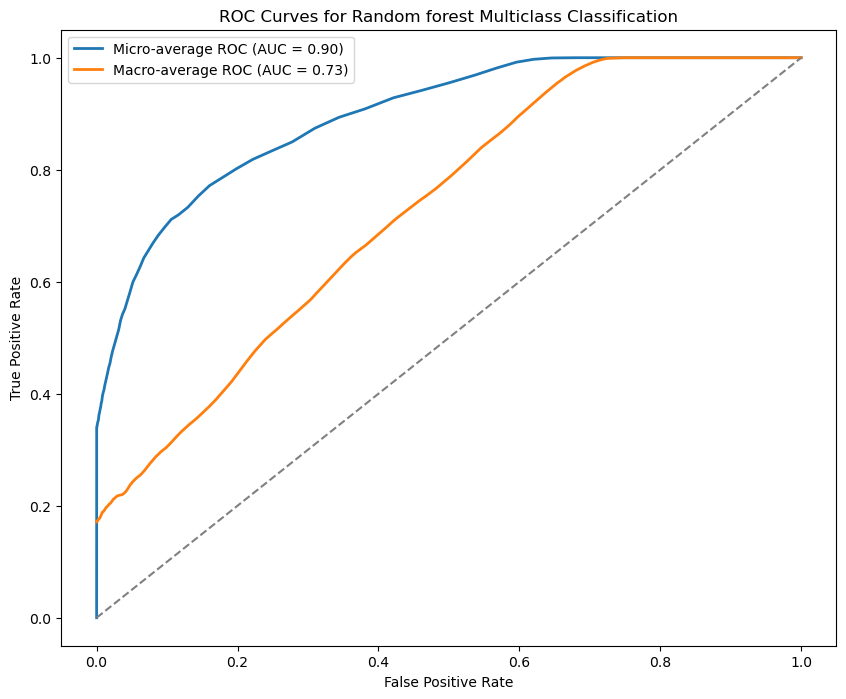

In [120]:
y_test_bin = label_binarize(y_test, classes=classes)
# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    # Get the ROC curve for each class (i)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], [prob[i] for prob in y_prob_rf])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob_rf.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot micro-average ROC
plt.plot(fpr_micro, tpr_micro, linewidth=2,
         label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')

# Plot macro-average ROC
plt.plot(all_fpr, mean_tpr, linewidth=2,
         label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})')

# Add diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random forest Multiclass Classification')
plt.legend()
plt.show()


rf feature importance

In [123]:
## feature importance

importance_rf = pd.DataFrame({'feature': X.columns,'importance': rf_best.feature_importances_})
importance_rf .sort_values(by='importance', ascending=False)


,feature,importance
17,PLT_Count,0.045413
2,Sickness_Duration_Months,0.036141
25,CRP,0.034297
3,RBC_Count,0.029917
4,Hemoglobin,0.029711
...,...,...
67,Anti_OmpC,0.000472
68,pANCA,0.000464
48,Anti_CBir1,0.000389
59,ANCA,0.000387


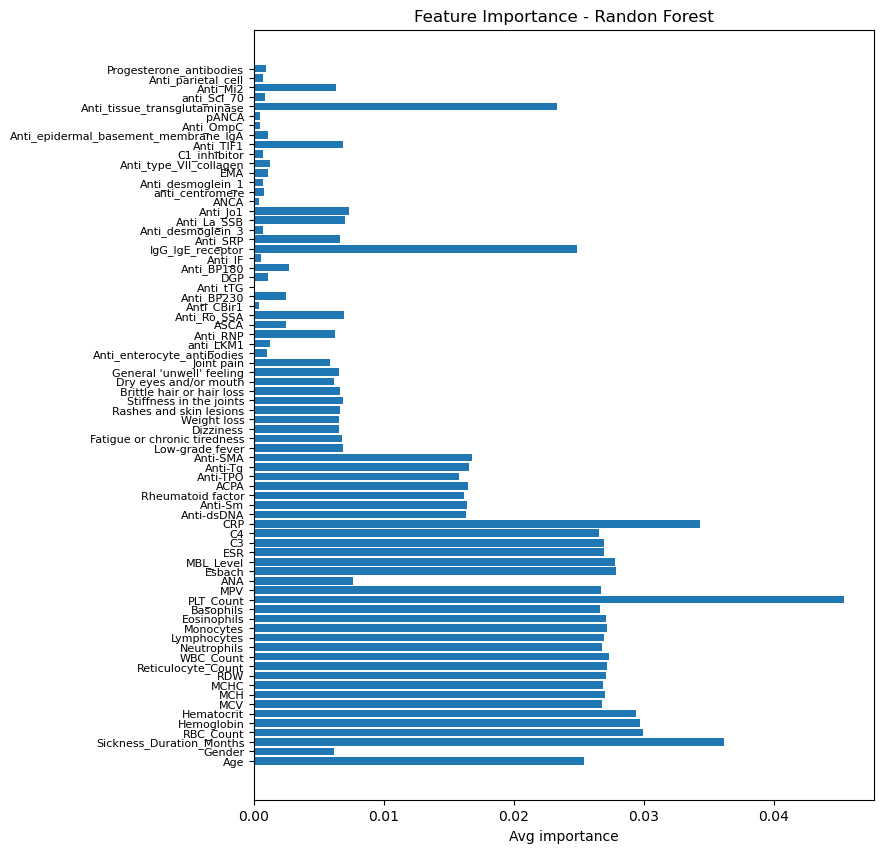

In [124]:
plt.figure(figsize=(8, 10))
plt.barh(importance_rf['feature'], importance_rf['importance'])
plt.xlabel('Avg importance')
plt.yticks(fontsize=8)
plt.title('Feature Importance - Randon Forest')
plt.show()

### logistic regression 

train w/ grid search and get best params and best weighted auc score

In [32]:
## log_Reg
scoring_metrics = {
    'roc_auc': make_scorer(roc_auc_score, average='weighted', needs_proba=True, multi_class='ovr'),
    'accuracy': 'accuracy', 
    'f1': make_scorer(f1_score, average='weighted',zero_division=1),
    'precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'recall': make_scorer(recall_score, average='weighted',zero_division=1)
}
lg = GridSearchCV(LogisticRegression(max_iter=10000, penalty='l2',n_jobs=-1), 
                  param_grid= {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs','newton-cg', 'saga']},
                  scoring= scoring_metrics, refit='roc_auc', cv=3)

In [34]:
lg.fit(x_train_scale, y_resampled)

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
0.8026561583332944
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        3.615224      0.236336         0.146585        0.003709     0.1   
1        6.157565      0.307839         0.140784        0.002398     0.1   
2      156.848405      0.969142         0.146544        0.002474     0.1   
3        5.887898      0.247746         0.141959        0.003213       1   
4       12.417295      0.556099         0.144289        0.004328       1   
5      422.030541     12.321684         0.142385        0.002020       1   
6        7.343528      0.742094         0.138983        0.001243      10   
7       17.584092      2.298949         0.145579        0.001188      10   
8      368.638057      1.311512         0.144433        0.003522      10   
9        5.699509      1.441676         0.143593        0.002632     100   
10      20.550116      0.544308         0.143604        0.002729     100   
11     465.346102     

In [43]:
## results of log reg 
print("Best Parameters:", lg.best_params_)
print(lg.best_score_)
pd.set_option('display.max_columns', None)
pd.DataFrame(lg.cv_results_)

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
0.8026561583332944


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,3.615224,0.236336,0.146585,0.003709,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.795937,0.812621,0.799411,0.802656,0.007187,1,0.272914,0.271414,0.257698,0.267342,0.006847,2,0.274349,0.268343,0.253478,0.265390,0.008773,3,0.300904,0.291269,0.294808,0.295660,0.003979,2,0.272914,0.271414,0.257698,0.267342,0.006847,2
1,6.157565,0.307839,0.140784,0.002398,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.795937,0.812621,0.799411,0.802656,0.007187,2,0.272993,0.271414,0.257698,0.267368,0.006868,1,0.274423,0.268343,0.253478,0.265415,0.008798,1,0.300975,0.291269,0.294808,0.295684,0.004011,1,0.272993,0.271414,0.257698,0.267368,0.006868,1
2,156.848405,0.969142,0.146544,0.002474,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.795935,0.812619,0.799409,0.802654,0.007188,3,0.272914,0.271414,0.257698,0.267342,0.006847,2,0.274350,0.268343,0.253478,0.265391,0.008773,2,0.300902,0.291269,0.294808,0.295660,0.003978,3,0.272914,0.271414,0.257698,0.267342,0.006847,2
3,5.887898,0.247746,0.141959,0.003213,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.795843,0.812570,0.799408,0.802607,0.007194,5,0.272598,0.270940,0.257698,0.267079,0.006668,12,0.274069,0.267831,0.253528,0.265143,0.008599,11,0.300481,0.290181,0.294809,0.295157,0.004212,11,0.272598,0.270940,0.257698,0.267079,0.006668,12
4,12.417295,0.556099,0.144289,0.004328,1,newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.795842,0.812571,0.799408,0.802607,0.007195,4,0.272756,0.271019,0.257777,0.267184,0.006690,4,0.274186,0.267924,0.253590,0.265233,0.008621,4,0.300586,0.290288,0.294860,0.295245,0.004213,5,0.272756,0.271019,0.257777,0.267184,0.006690,4
5,422.030541,12.321684,0.142385,0.002020,1,saga,"{'C': 1, 'solver': 'saga'}",0.795839,0.812571,0.799405,0.802605,0.007196,6,0.272677,0.271019,0.257777,0.267158,0.006668,5,0.274134,0.267924,0.253591,0.265216,0.008602,5,0.300539,0.290283,0.294861,0.295228,0.004195,6,0.272677,0.271019,0.257777,0.267158,0.006668,5
6,7.343528,0.742094,0.138983,0.001243,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",0.795829,0.812566,0.799408,0.802601,0.007196,7,0.272677,0.270940,0.257698,0.267105,0.006690,8,0.274121,0.267854,0.253562,0.265179,0.008604,9,0.300502,0.290239,0.294884,0.295208,0.004196,9,0.272677,0.270940,0.257698,0.267105,0.006690,8
7,17.584092,2.298949,0.145579,0.001188,10,newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.795829,0.812566,0.799408,0.802601,0.007196,8,0.272677,0.270940,0.257698,0.267105,0.006690,8,0.274121,0.267854,0.253561,0.265179,0.008604,10,0.300502,0.290239,0.294886,0.295209,0.004196,8,0.272677,0.270940,0.257698,0.267105,0.006690,8
8,368.638057,1.311512,0.144433,0.003522,10,saga,"{'C': 10, 'solver': 'saga'}",0.795825,0.812564,0.799405,0.802598,0.007197,11,0.272598,0.270861,0.257777,0.267079,0.006616,11,0.274046,0.267782,0.253590,0.265139,0.008558,12,0.300394,0.290178,0.294866,0.295146,0.004175,12,0.272598,0.270861,0.257777,0.267079,0.006616,11
9,5.699509,1.441676,0.143593,0.002632,100,lbfgs,"{'C': 100, 'solver': 'lbfgs'}",0.795828,0.812564,0.799408,0.802600,0.007196,10,0.272677,0.270940,0.257777,0.267131,0.006653,6,0.274122,0.267856,0.253660,0.265213,0.008560,6,0.300501,0.290246,0.295009,0.295252,0.004190,4,0.272677,0.270940,0.257777,0.267131,0.006653,6


fit log reg to test set

In [49]:
lg_best= lg.best_estimator_
print(lg_best)
print("parameter:",lg.best_params_)

y_pred_lg = lg_best.predict(x_test_scale)
y_prob_lg = lg_best.predict_proba(x_test_scale)

print("ROC score weighted -- test:",roc_auc_score(y_test, y_prob_lg, average='weighted', multi_class='ovr'))
print("ROC score micro -- test:",roc_auc_score(y_test, y_prob_lg, average='micro', multi_class='ovr'))
print("ROC score micro -- test:",roc_auc_score(y_test, y_prob_lg, average='macro', multi_class='ovr'))

print('accuracy:',accuracy_score(y_test, y_pred_lg))
print('f1:',f1_score(y_test, y_pred_lg, average ='weighted'))
print('precision:', precision_score(y_test, y_pred_lg, average= 'weighted'))
print('recall:',recall_score(y_test, y_pred_lg, average= 'weighted'))


LogisticRegression(C=0.1, max_iter=10000, n_jobs=-1)
parameter: {'C': 0.1, 'solver': 'lbfgs'}
ROC score weighted -- test: 0.7900331863441046
ROC score micro -- test: 0.8686485708108109
ROC score micro -- test: 0.7361226664316055
accuracy: 0.3752
f1: 0.39700724346739996
precision: 0.4416673760688104
recall: 0.3752


log reg roc curve

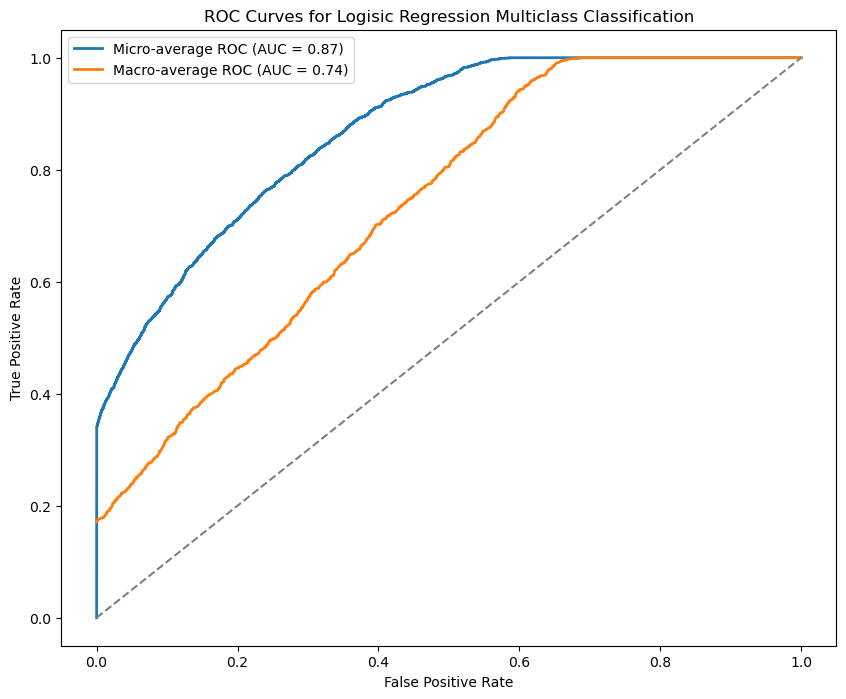

In [51]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


y_test_bin = label_binarize(y_test, classes=classes)
# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    # Get the ROC curve for each class (i)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], [prob[i] for prob in y_prob_lg])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob_lg.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot micro-average ROC
plt.plot(fpr_micro, tpr_micro, linewidth=2,
         label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')

# Plot macro-average ROC
plt.plot(all_fpr, mean_tpr, linewidth=2,
         label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})')

# Add diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logisic Regression Multiclass Classification')
plt.legend()
plt.show()


In [112]:
##feature importance
avg_imp_rf = np.mean(np.abs(lg_best.coef_), axis=0) 
importance = pd.DataFrame({'feature':X.columns,'importance':avg_imp_rf})


In [113]:
importance.sort_values(by='importance', ascending=False)


,feature,importance
19,ANA,0.176845
42,Joint pain,0.136321
1,Gender,0.125845
40,Dry eyes and/or mouth,0.124365
69,Anti_tissue_transglutaminase,0.122007
...,...,...
68,pANCA,0.005996
67,Anti_OmpC,0.002910
48,Anti_CBir1,0.002910
59,ANCA,0.002910


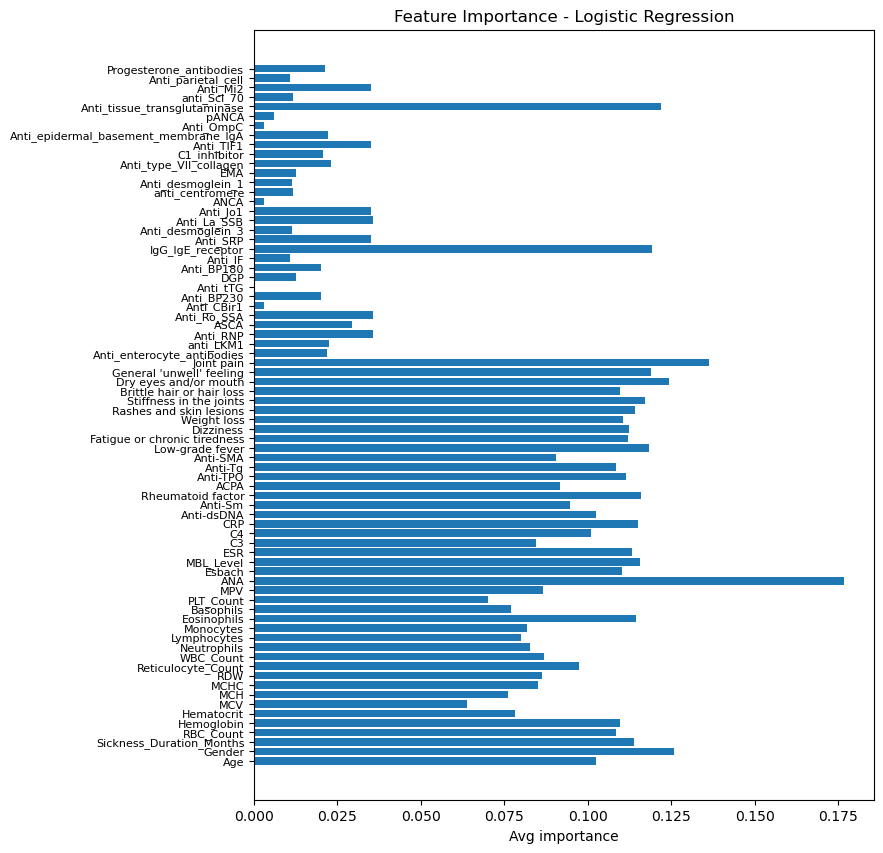

In [114]:
plt.figure(figsize=(8, 10))
plt.barh(importance['feature'], importance['importance'])
plt.xlabel('Avg importance')
plt.yticks(fontsize=8)
plt.title('Feature Importance - Logistic Regression')
plt.show()

#### SVM

train w/ grid search and get best params and best weighted auc score

In [36]:
scoring_metrics = {
    'roc_auc': make_scorer(roc_auc_score, average='weighted', needs_proba=True, multi_class='ovr'),
    'accuracy': 'accuracy', 
    'f1': make_scorer(f1_score, average='weighted',zero_division=1),
    'precision': make_scorer(precision_score, average='weighted',zero_division=1),
    'recall': make_scorer(recall_score, average='weighted',zero_division=1)
}

clf = GridSearchCV(svm.SVC(random_state=1, gamma='scale', max_iter=10000, probability=True),
                   param_grid= {'C': [0.1, 1, 10, 100],  'kernel': ['linear','rbf']},
                   scoring= scoring_metrics, refit='roc_auc', cv=3)
                   

In [37]:
clf.fit(x_train_scale, y_resampled)

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packag

GridSearchCV(cv=3,
             estimator=SVC(max_iter=10000, probability=True, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, average=weighted, zero_division=1),
                      'precision': make_scorer(precision_score, average=weighted, zero_division=1),
                      'recall': make_scorer(recall_score, average=weighted, zero_division=1),
                      'roc_auc': make_scorer(roc_auc_score, needs_proba=True, average=weighted, multi_class=ovr)})

In [53]:
print("Best Parameters:", clf.best_params_)
print(clf.best_score_)
pd.set_option('display.max_columns', None)
pd.DataFrame(clf.cv_results_)

Best Parameters: {'C': 100, 'kernel': 'rbf'}
0.9878002725769978


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,182.693027,4.343444,56.222693,1.005204,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.817355,0.838230,0.827487,0.827691,0.008523,6,0.303308,0.318860,0.307437,0.309868,0.006578,5,0.306706,0.312016,0.301055,0.306592,0.004475,5,0.337837,0.332041,0.337449,0.335776,0.002646,5,0.303308,0.318860,0.307437,0.309868,0.006578,5
1,309.174714,2.943434,81.045104,1.687449,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.862534,0.881879,0.858056,0.867489,0.010338,4,0.355175,0.375227,0.347150,0.359184,0.011808,4,0.360269,0.361628,0.334870,0.352255,0.012306,4,0.409992,0.407569,0.407476,0.408346,0.001165,4,0.355175,0.375227,0.347150,0.359184,0.011808,4
2,366.309484,8.099730,57.173494,1.232624,1,linear,"{'C': 1, 'kernel': 'linear'}",0.818572,0.838653,0.827933,0.828386,0.008204,5,0.300782,0.316650,0.308148,0.308526,0.006484,6,0.303127,0.309799,0.300796,0.304574,0.003815,6,0.328943,0.324463,0.332985,0.328797,0.003481,6,0.300782,0.316650,0.308148,0.308526,0.006484,6
3,228.844741,4.740064,81.278124,2.065166,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.957403,0.978541,0.967623,0.967855,0.008631,3,0.655641,0.775637,0.740881,0.724053,0.050413,3,0.698624,0.761557,0.713934,0.724705,0.026797,3,0.784816,0.772701,0.729701,0.762406,0.023649,3,0.655641,0.775637,0.740881,0.724053,0.050413,3
4,387.473671,1.294525,57.876276,4.160951,10,linear,"{'C': 10, 'kernel': 'linear'}",0.755472,0.735658,0.747181,0.746103,0.008125,7,0.199021,0.198311,0.196431,0.197921,0.001093,7,0.189079,0.189014,0.185854,0.187982,0.001505,7,0.207259,0.233434,0.240975,0.227223,0.014448,8,0.199021,0.198311,0.196431,0.197921,0.001093,7
5,214.225514,5.737525,76.255080,2.564119,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.980512,0.991628,0.991161,0.987767,0.005134,2,0.764348,0.880398,0.872572,0.839106,0.052958,2,0.801747,0.874835,0.855962,0.844181,0.030979,2,0.872915,0.872003,0.852947,0.865955,0.009206,2,0.764348,0.880398,0.872572,0.839106,0.052958,2
6,387.632595,1.031117,52.409609,0.175883,100,linear,"{'C': 100, 'kernel': 'linear'}",0.748034,0.739138,0.735854,0.741009,0.005146,8,0.202810,0.194600,0.191378,0.196263,0.004813,8,0.193032,0.184770,0.181886,0.186563,0.004724,8,0.237266,0.228608,0.235225,0.233700,0.003696,7,0.202810,0.194600,0.191378,0.196263,0.004813,8
7,213.978059,5.887068,72.161911,0.358355,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.980590,0.991643,0.991168,0.987800,0.005102,1,0.764348,0.881424,0.873204,0.839659,0.053358,1,0.801889,0.875842,0.856865,0.844865,0.031361,1,0.873819,0.873130,0.853924,0.866958,0.009221,1,0.764348,0.881424,0.873204,0.839659,0.053358,1


fit svc to test set

In [58]:
clf_best= clf.best_estimator_
print(clf_best)
print("parameter:",clf.best_params_)

y_pred_clf = clf_best.predict(x_test_scale)
y_prob_clf = clf_best.predict_proba(x_test_scale)

print("ROC score weighted-- test:",roc_auc_score(y_test, y_prob_clf, average='weighted', multi_class='ovr'))
print("ROC score micro -- test:",roc_auc_score(y_test, y_prob_clf, average='micro', multi_class='ovr'))
print("ROC score macro -- test:",roc_auc_score(y_test, y_prob_clf, average='macro', multi_class='ovr'))

print('accuracy:',accuracy_score(y_test, y_pred))
print('f1:',f1_score(y_test, y_pred_clf, average ='weighted'))
print('precision:',precision_score(y_test, y_pred_clf, average= 'weighted'))
print('recall:',recall_score(y_test, y_pred_clf, average= 'weighted'))


SVC(C=100, max_iter=10000, probability=True, random_state=1)
parameter: {'C': 100, 'kernel': 'rbf'}
ROC score weighted-- test: 0.7765571882984801
ROC score micro -- test: 0.8879322162162161
ROC score macro -- test: 0.724784557649255
accuracy: 0.3752
f1: 0.39654572542176475
precision: 0.3876149011810796
recall: 0.4128


svc roc curve

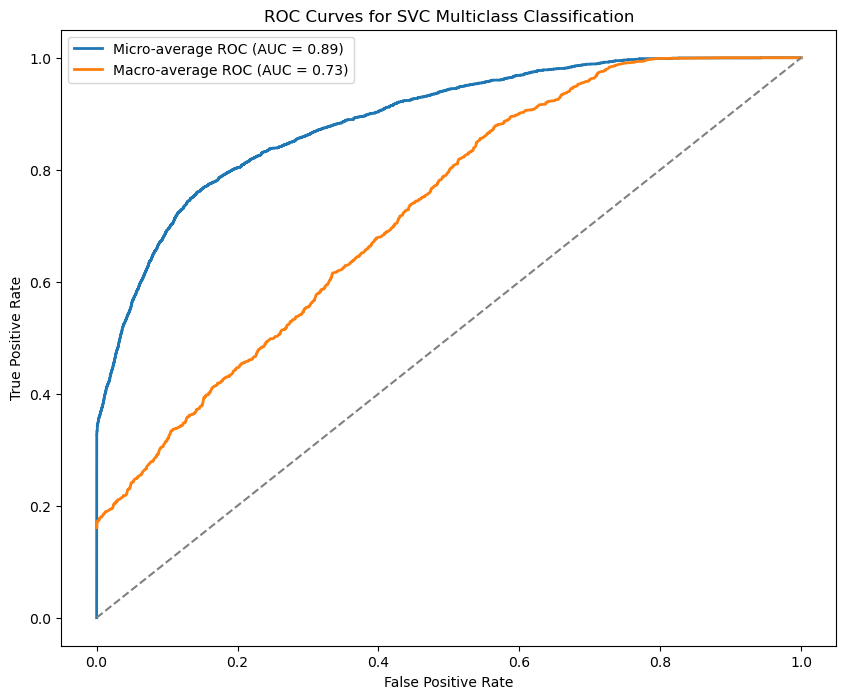

In [60]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


y_test_bin = label_binarize(y_test, classes=classes)
# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    # Get the ROC curve for each class (i)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], [prob[i] for prob in y_prob_clf])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob_clf.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot micro-average ROC
plt.plot(fpr_micro, tpr_micro, linewidth=2,
         label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')

# Plot macro-average ROC
plt.plot(all_fpr, mean_tpr, linewidth=2,
         label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})')

# Add diagonal line for random guess
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVC Multiclass Classification')
plt.legend()
plt.show()
